In [8]:
import pandas as pd
import numpy as np
import scipy.io 

In [22]:
modeling_data = pd.read_csv("data_for_modeling_matlab_first_session.csv", index_col=0)

In [23]:
len(modeling_data.mturkID.unique())

146

In [21]:
for n, gp in modeling_data.groupby('mturkID'):
    print(n)
    df_to_save =(gp.reset_index(drop=True)).drop(['mturkID'], axis=1)
    df_to_save['choice'] = df_to_save['choice'].map({'nogo': 2, 'go': 1})
    df_to_save['stimulus'] = df_to_save['stimulus'].map({'go2win': 1, 'go2avoidPun': 2, 'nogo2avoidPun': 3, 'nogo2win': 4})
    df_to_save.to_csv( 'data_for_modeling_first_session/'+ f"{n}.csv", index=False)


NameError: name 'modeling_data' is not defined

In [5]:
modeling_data

,mturkID,choice,feedback_points,stimulus
1049,A353XKDTUX10NC,nogo,0,go2avoidPun
1055,A353XKDTUX10NC,go,1,go2win
1061,A353XKDTUX10NC,go,-1,nogo2avoidPun
1067,A353XKDTUX10NC,go,0,nogo2win
1073,A353XKDTUX10NC,nogo,-1,go2avoidPun
...,...,...,...,...
166883,A1MJVTR0PCKBWW,nogo,0,go2win
166889,A1MJVTR0PCKBWW,nogo,1,nogo2win
166895,A1MJVTR0PCKBWW,nogo,-1,go2avoidPun
166901,A1MJVTR0PCKBWW,go,-1,nogo2avoidPun


In [6]:
import scipy.io 

def read_first_session_data(filename = 'modelling_data_second_session/second210228_EM_-llbaepxb_modified_1-ite2.mat'):
    # model_data_second = scipy.io.loadmat('modelling_data_second_session/second210228_EM_-llbaepxb_modified-ite8.mat')
    # model_data_second = scipy.io.loadmat('modelling_data_second_session/second210228_EM_-llbaepxb_modified_0-ite2.mat')
    model_data_second = scipy.io.loadmat(filename)
    participant_data_second = scipy.io.loadmat('modelling_data_second_session/gonogo_data_second_session.mat')
    model_result_df_second = {}
    model_result_df_second['mturkID'] = []
    for i in range(114):

        model_result_df_second['mturkID'].append((participant_data_second['subject_ids'][0][i][0]))
    model_result_df_second['alpha'] = 1/(1+np.exp(-model_data_second['E'][1]))
    model_result_df_second['beta'] = np.exp(model_data_second['E'][0])
    model_result_df_second['noise'] = 1/(1+np.exp(-model_data_second['E'][3]))
    model_result_df_second['bias'] = model_data_second['E'][4]
    model_result_df_second['pav'] = np.exp(model_data_second['E'][2])
    pd.DataFrame(model_result_df_second).to_csv("result_of_modeling_matlab_second_session.csv", index=False)



In [7]:
import glob

model_result_first_bci = {}
model_result_first_bci['BIC'] = []
model_result_first_bci['Model'] = []
model_result_second_bci = {}
model_result_second_bci['BIC'] = []
model_result_second_bci['Model'] = []

for file in glob.glob("BIC result/*"):
    if(file.split('/')[-1][0] == 'f'):
        model_data = scipy.io.loadmat(file)
        model_result_first_bci['BIC'].append(model_data['bici'][0][0])
        model_result_first_bci['Model'].append((file.split('-')[1]))
    else:
        model_data = scipy.io.loadmat(file)
        print(file)

        model_result_second_bci['BIC'].append(model_data['bici'][0][0])
        model_result_second_bci['Model'].append((file.split('-')[1]))
        


BIC result/second210228_EM_-llbax-ite5_meanerror.mat
BIC result/second210228_EM_-ll2baxb-ite4_meanerror.mat
BIC result/second210228_EM_-llbaxb-ite2_meanerror.mat
BIC result/second210228_EM_-llbaepxb-ite4_meanerror.mat
BIC result/second210228_EM_-llba-ite4_meanerror.mat
BIC result/second210228_EM_-ll2baepcxb-ite4_meanerror.mat
BIC result/second210228_EM_-ll2baepxb-ite5_meanerror.mat


In [8]:
model_dict = {
    "llba":"RW",
    "llbax": "RW + noise",
    "llbaxb": "RW + noise + bias",
    "llbaepxb": "RW + noise + bias + Pav",
    "ll2baxb":"RW(rew/pun) + noise + bias",
    "ll2baepxb":"RW(rew/pun) + noise + bias + Pav",
    "ll2baepcxb" : "RW(rew/pun) + noise + bias + Pav(const)",
}


first_bic_df = pd.DataFrame(model_result_first_bci)
first_bic_df['Model'] = first_bic_df.Model.map(model_dict)
first_bic_df = first_bic_df.sort_values(by='Model', ascending=True)

second_bic_df = pd.DataFrame(model_result_second_bci)
second_bic_df['Model'] = second_bic_df.Model.map(model_dict)
second_bic_df = second_bic_df.sort_values(by='Model', ascending=True)

[(13800.0, 18500.0), Text(0.5, 1.0, 'First Session Modeling BIC')]

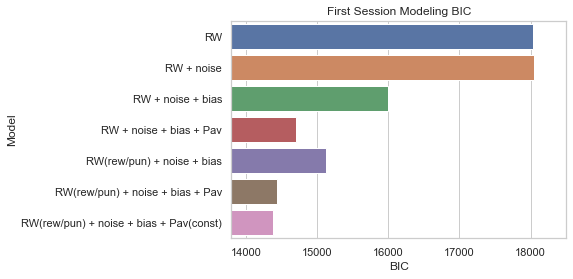

In [9]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="BIC", y="Model", data=first_bic_df)
ax.set(xlim=(13800, 18500), title="First Session Modeling BIC")

In [13]:
first_bic_df.BIC[1] - first_bic_df.BIC[5]

-53.20291699618065

[(9900.0, 12700.0), Text(0.5, 1.0, 'Second Session Modeling BIC')]

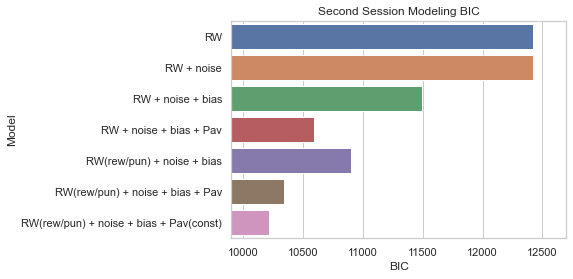

In [14]:
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="BIC", y="Model", data=second_bic_df)
ax.set(xlim=(9900, 12700), title="Second Session Modeling BIC")

In [16]:
second_bic_df.BIC[6] - second_bic_df.BIC[5] 

131.70188165960644

In [1]:
import scipy.io 
model_data_first = scipy.io.loadmat('BIC result/first210228_EM_-ll2baepcxb-ite3_meanerror.mat')
participant_data_first = scipy.io.loadmat('modelling_data_first_session/gonogo_data_first_session.mat')
model_result_df_first = {}
model_result_df_first['mturkID'] = []
for i in range(146):

    model_result_df_first['mturkID'].append((participant_data_first['subject_ids'][0][i][0]))
model_result_df_first['alpha'] = 1/(1+np.exp(-model_data_first['E'][2]))
model_result_df_first['beta_rew'] = np.exp(model_data_first['E'][0])
model_result_df_first['beta_pun'] = np.exp(model_data_first['E'][1])

model_result_df_first['noise'] = 1/(1+np.exp(-model_data_first['E'][4]))
model_result_df_first['bias'] = model_data_first['E'][5]
model_result_df_first['pav'] = np.exp(model_data_first['E'][3])
pd.DataFrame(model_result_df_first).to_csv("result_of_modeling_matlab_first_session.csv", index=False)


NameError: name 'np' is not defined

In [83]:
pd.DataFrame(model_result_df_first).describe()

,alpha,beta_rew,beta_pun,noise,bias,pav
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.334432,9.712342,4.021571,0.926076,1.307784,1.248126
std,0.157908,8.184933,3.318423,0.085762,1.013521,1.241718
min,0.053498,0.386163,0.500089,0.464027,-1.922730,0.107839
25%,0.214941,3.925609,1.264539,0.929770,0.716472,0.451461
50%,0.321726,7.678014,3.129930,0.959141,1.299511,0.765731
75%,0.424549,13.669334,5.726250,0.975530,2.002116,1.536917
max,0.834755,55.978085,15.886796,0.983176,4.112235,5.968860


In [15]:
pd.DataFrame(model_result_df_first).describe()

,alpha,beta,noise,bias,pav
count,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.217193,8.347092,0.942663,1.097293,0.245348
std,0.176819,7.388634,0.073412,1.095112,0.344972
min,0.020261,0.773464,0.572578,-2.787176,0.021351
25%,0.081970,2.727998,0.951965,0.451473,0.072528
50%,0.165423,6.873869,0.966848,1.146737,0.121969
75%,0.314700,10.570078,0.977164,1.766248,0.248819
max,0.841882,49.490301,0.984991,3.948413,2.131637


# ll2baepcxb

In [7]:
model_data_second = scipy.io.loadmat('BIC result/first210228_EM_-ll2baepcxb-ite3_meanerror.mat')


participant_data_second = scipy.io.loadmat('modelling_data_first_session/gonogo_data_first_session.mat')
model_result_df_second = {}
model_result_df_second['mturkID'] = []
for i in range(146):

    model_result_df_second['mturkID'].append((participant_data_second['subject_ids'][0][i][0]))
model_result_df_second['alpha'] = 1/(1+np.exp(-model_data_second['E'][2]))
model_result_df_second['beta_rew'] = np.exp(model_data_second['E'][0])
model_result_df_second['beta_pun'] = np.exp(model_data_second['E'][1])
model_result_df_second['noise'] = 1/(1+np.exp(-model_data_second['E'][4]))
model_result_df_second['bias'] = model_data_second['E'][5]
model_result_df_second['pav'] = np.exp(model_data_second['E'][3])
pd.DataFrame(model_result_df_second).to_csv("Modeling results data/first_ll2baepcxb.csv", index=False)



# ll2baepxb

In [20]:
model_data_second = scipy.io.loadmat('BIC result/first210228_EM_-ll2baepxb-ite5_meanerror.mat')


participant_data_second = scipy.io.loadmat('modelling_data_first_session/gonogo_data_first_session.mat')
model_result_df_second = {}
model_result_df_second['mturkID'] = []
for i in range(146):

    model_result_df_second['mturkID'].append((participant_data_second['subject_ids'][0][i][0]))
model_result_df_second['alpha'] = 1/(1+np.exp(-model_data_second['E'][2]))
model_result_df_second['beta_rew'] = np.exp(model_data_second['E'][0])
model_result_df_second['beta_pun'] = np.exp(model_data_second['E'][1])
model_result_df_second['noise'] = 1/(1+np.exp(-model_data_second['E'][4]))
model_result_df_second['bias'] = model_data_second['E'][5]
model_result_df_second['pav'] = np.exp(model_data_second['E'][3])
pd.DataFrame(model_result_df_second).to_csv("Modeling results data/first_ll2baepxb.csv", index=False)



# ll2baxb

In [19]:
model_data_second = scipy.io.loadmat('BIC result/first210228_EM_-ll2baxb-ite1_meanerror.mat')


participant_data_second = scipy.io.loadmat('modelling_data_first_session/gonogo_data_first_session.mat')
model_result_df_second = {}
model_result_df_second['mturkID'] = []
for i in range(146):

    model_result_df_second['mturkID'].append((participant_data_second['subject_ids'][0][i][0]))
model_result_df_second['alpha'] = 1/(1+np.exp(-model_data_second['E'][2]))
model_result_df_second['beta_rew'] = np.exp(model_data_second['E'][0])
model_result_df_second['beta_pun'] = np.exp(model_data_second['E'][1])
model_result_df_second['noise'] = 1/(1+np.exp(-model_data_second['E'][3]))
model_result_df_second['bias'] = model_data_second['E'][4]
# model_result_df_second['pav'] = np.exp(model_data_second['E'][3])
pd.DataFrame(model_result_df_second).to_csv("Modeling results data/first_ll2baxb.csv", index=False)

# llbaepxb

In [18]:
model_data_second = scipy.io.loadmat('BIC result/first210228_EM_-llbaepxb-ite1_meanerror.mat')


participant_data_second = scipy.io.loadmat('modelling_data_first_session/gonogo_data_first_session.mat')
model_result_df_second = {}
model_result_df_second['mturkID'] = []
for i in range(146):

    model_result_df_second['mturkID'].append((participant_data_second['subject_ids'][0][i][0]))
model_result_df_second['alpha'] = 1/(1+np.exp(-model_data_second['E'][1]))
model_result_df_second['beta'] = np.exp(model_data_second['E'][0])
model_result_df_second['noise'] = 1/(1+np.exp(-model_data_second['E'][3]))
model_result_df_second['bias'] = model_data_second['E'][4]
model_result_df_second['pav'] = np.exp(model_data_second['E'][2])
pd.DataFrame(model_result_df_second).to_csv("Modeling results data/first_llbaepxb.csv", index=False)

# llbaxb

In [17]:
model_data_second = scipy.io.loadmat('BIC result/first210228_EM_-llbaxb-ite4_meanerror.mat')


participant_data_second = scipy.io.loadmat('modelling_data_first_session/gonogo_data_first_session.mat')
model_result_df_second = {}
model_result_df_second['mturkID'] = []
for i in range(146):

    model_result_df_second['mturkID'].append((participant_data_second['subject_ids'][0][i][0]))
model_result_df_second['alpha'] = 1/(1+np.exp(-model_data_second['E'][1]))
model_result_df_second['beta'] = np.exp(model_data_second['E'][0])
# model_result_df_second['beta_pun'] = np.exp(model_data_second['E'][1])
model_result_df_second['noise'] = 1/(1+np.exp(-model_data_second['E'][2]))
model_result_df_second['bias'] = model_data_second['E'][3]
# model_result_df_second['pav'] = np.exp(model_data_second['E'][3])
pd.DataFrame(model_result_df_second).to_csv("Modeling results data/first_llbaxb.csv", index=False)

# llbax

In [15]:
model_data_second = scipy.io.loadmat('BIC result/first210228_EM_-llbax-ite4_meanerror.mat')


participant_data_second = scipy.io.loadmat('modelling_data_first_session/gonogo_data_first_session.mat')
model_result_df_second = {}
model_result_df_second['mturkID'] = []
for i in range(146):

    model_result_df_second['mturkID'].append((participant_data_second['subject_ids'][0][i][0]))
model_result_df_second['alpha'] = 1/(1+np.exp(-model_data_second['E'][1]))
model_result_df_second['beta'] = np.exp(model_data_second['E'][0])
# model_result_df_second['beta_rew'] = np.exp(model_data_second['E'][0])
# model_result_df_second['beta_pun'] = np.exp(model_data_second['E'][1])
model_result_df_second['noise'] = 1/(1+np.exp(-model_data_second['E'][2]))
# model_result_df_second['bias'] = model_data_second['E'][5]
# model_result_df_second['pav'] = np.exp(model_data_second['E'][3])
pd.DataFrame(model_result_df_second).to_csv("Modeling results data/first_llbax.csv", index=False)

# llba

In [14]:
model_data_second = scipy.io.loadmat('BIC result/first210228_EM_-llba-ite3_meanerror.mat')


participant_data_second = scipy.io.loadmat('modelling_data_first_session/gonogo_data_first_session.mat')
model_result_df_second = {}
model_result_df_second['mturkID'] = []
for i in range(146):

    model_result_df_second['mturkID'].append((participant_data_second['subject_ids'][0][i][0]))
model_result_df_second['alpha'] = 1/(1+np.exp(-model_data_second['E'][1]))
model_result_df_second['beta'] = np.exp(model_data_second['E'][0])
# model_result_df_second['beta_pun'] = np.exp(model_data_second['E'][2])
# model_result_df_second['noise'] = 1/(1+np.exp(-model_data_second['E'][4]))
# model_result_df_second['bias'] = model_data_second['E'][5]
# model_result_df_second['pav'] = np.exp(model_data_second['E'][3])
pd.DataFrame(model_result_df_second).to_csv("Modeling results data/first_llba.csv", index=False)